Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [52]:
from random import random, seed
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [53]:
UNIVERSE_SIZE = 10000
NUM_SETS = 1000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [54]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)


## Helper Functions

In [55]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [56]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(np.True_, np.float64(4272180.31176287))

In [57]:
# A random solution with random 50% of the sets
solution = np.random.random(NUM_SETS) < .7
valid(solution), cost(solution)

(np.True_, np.float64(2941627.910647462))

In [70]:
def tweak(old_solution):  # Simple random tweak
    new_solution = old_solution.copy()
    i = rng.integers(0, len(old_solution))
    new_solution[i] = not new_solution[i]  # Flip a random element
    return new_solution

def cost(solution):  # Example cost function
    return np.sum(COSTS[solution])  # Sum the costs of the selected sets

def valid(solution):  # Example validity function
    covered = np.any(SETS[solution], axis=0)  # Check which elements of the universe are covered
    return np.all(covered)  # The solution is valid if it covers the entire universe

def fitness(solution):
    return (valid(solution), -cost(solution))  # Minimize cost while keeping validity

def best_neighbor(solution, num_neighbors):  # Find the best neighbor using simple tweak
    best = tweak(solution)
    for i in range(num_neighbors - 1):
        neighbor = tweak(solution)
        if fitness(neighbor) > fitness(best):
            best = neighbor
    return best

In [71]:

def initialize_data(NUM_SETS, UNIVERSE_SIZE, DENSITY):
    global SETS, COSTS, rng
    rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

    SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
    for s in range(UNIVERSE_SIZE):
        if not np.any(SETS[:, s]):
            SETS[np.random.randint(NUM_SETS), s] = True
    COSTS = np.pow(SETS.sum(axis=1), 1.1)
    return SETS, COSTS, rng

def local_search_with_restarts(num_of_restarts, steps, num_of_neighbors, NUM_SETS, rng):
    final_solution = rng.random(NUM_SETS) < 1  # All sets are selected initially
    cost_history = []

    total_steps = 0

    for i in range(num_of_restarts):
        tmp_solution = rng.random(NUM_SETS) < 0.05  # Initialize random solution

        for j in range(steps):  # In each step find the best neighbor and check if it's better than current solution
            best_of_neighbor = best_neighbor(tmp_solution, num_of_neighbors)
            if fitness(best_of_neighbor) > fitness(tmp_solution):
                tmp_solution = best_of_neighbor

            total_steps += 1
            cost_history.append(fitness(tmp_solution)[1])  # Track the cost of the solution at each step

        if fitness(tmp_solution) > fitness(final_solution):  # Check if the temp solution is better than the current best
            final_solution = tmp_solution

    # Plotting the cost history as a function of total steps
    plt.plot(range(len(cost_history)), cost_history)
    plt.xlabel('Total Steps')
    plt.ylabel('Fitness (Cost)')
    plt.title('Cost (Fitness) vs Total Steps')
    plt.show()

    return final_solution

def initialize_data_and_run_algo(num_of_restarts, steps, num_of_neighbors, UNIVERSE_SIZE, NUM_SETS, DENSITY):
    # Initialize the data
    SETS, COSTS, rng = initialize_data(NUM_SETS, UNIVERSE_SIZE, DENSITY)
    
    # Run the local search algorithm with restarts
    final_solution = local_search_with_restarts(num_of_restarts, steps, num_of_neighbors, NUM_SETS, rng)
    ic(fitness(final_solution))
    return final_solution

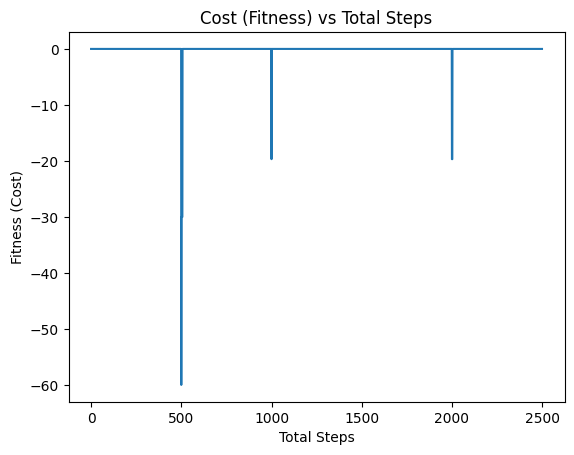

ic| fitness(final_solution): (np.True_, np.float64(-289.68297782101416))


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [72]:

# Case 1: Small problem
NUM_SETS = 10
UNIVERSE_SIZE = 100
DENSITY = 0.2
num_of_restarts = 5
steps = 500
num_of_neighbors = 5
initialize_data_and_run_algo(num_of_restarts, steps, num_of_neighbors, UNIVERSE_SIZE, NUM_SETS, DENSITY)


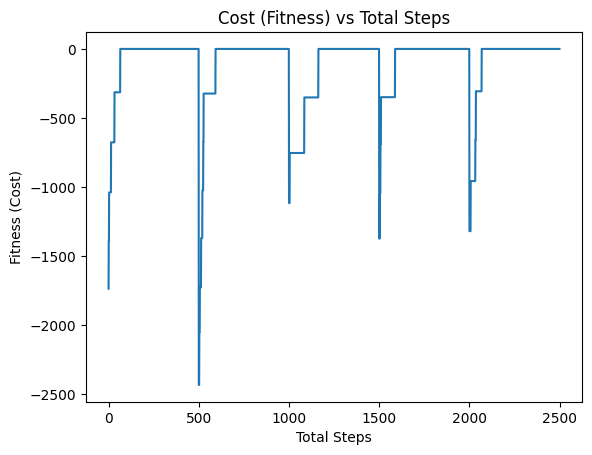

ic| fitness(final_solution): (np.True_, np.float64(-34378.31071779991))


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [68]:

# Case 2: Small problem
NUM_SETS = 100
UNIVERSE_SIZE = 1000
DENSITY = 0.2
num_of_restarts = 5
steps = 500
num_of_neighbors = 3
initialize_data_and_run_algo(num_of_restarts, steps, num_of_neighbors, UNIVERSE_SIZE, NUM_SETS, DENSITY)


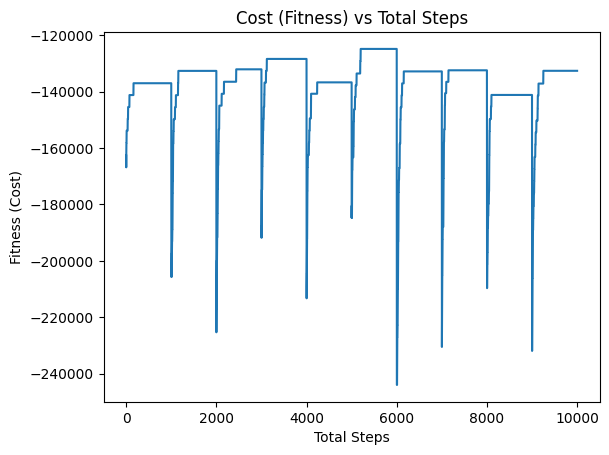

ic| fitness(final_solution): (np.True_, np.float64(-124788.36041313285))


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [69]:

# Case 3: Medium problem
NUM_SETS = 1000
UNIVERSE_SIZE = 10000
DENSITY = 0.2
num_of_restarts = 10
steps = 1000
num_of_neighbors = 10
initialize_data_and_run_algo(num_of_restarts, steps, num_of_neighbors, UNIVERSE_SIZE, NUM_SETS, DENSITY)


from now the problems were too big for my RAM so i couldn't run them but the idea is the same

In [ ]:

# Case 4: Large problem
NUM_SETS = 10000
UNIVERSE_SIZE = 100000
DENSITY = 0.1
num_of_restarts = 30
steps = 2000
num_of_neighbors = 15
initialize_data_and_run_algo(num_of_restarts, steps, num_of_neighbors, UNIVERSE_SIZE, NUM_SETS, DENSITY)


In [ ]:

# Case 5: Large problem
NUM_SETS = 10000
UNIVERSE_SIZE = 100000
DENSITY = 0.2
num_of_restarts = 30
steps = 2000
num_of_neighbors = 15
initialize_data_and_run_algo(num_of_restarts, steps, num_of_neighbors, UNIVERSE_SIZE, NUM_SETS, DENSITY)


In [ ]:

# Case 6: Large problem
NUM_SETS = 10000
UNIVERSE_SIZE = 100000
DENSITY = 0.3
num_of_restarts = 30
steps = 2000
num_of_neighbors = 15
initialize_data_and_run_algo(num_of_restarts, steps, num_of_neighbors, UNIVERSE_SIZE, NUM_SETS, DENSITY)